<a href="https://colab.research.google.com/github/Keshav1506/Topic-Modelling-on-BBC-News-Articles-using-LDA/blob/main/Topic_Modelling_on_BBC_News_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Topic Modelling on BBC News Articles**
***
[BBC](https://www.bbc.com/) stands for British Broadcasting Corporation.

It is an operational business division of the British Broadcasting Corporation (BBC) responsible for the gathering and broadcasting of news and current affairs in the UK and around the world. The department is the world's largest broadcast news organisation and generates about 120 hours of radio and television output each day, as well as online news coverage.

The service maintains 50 foreign news bureaus with more than 250 correspondents around the world.

BBC News Online is the BBC's news website. It is one of the most popular news websites in the UK, reaching over a quarter of the UK's internet users, and worldwide, with around 14 million global readers every month. 

The website contains international news coverage as well as articles based on entertainment, sport, science, and political news.



## **Objective** 

In this project the task is to identify major themes/topics across a collection of BBC news articles. 

## **Importing Neccessary Modules**

Now in this section we'll import all the neccessary libraries and packages we'll require to develop the required model.

In [ ]:
# importing os module
import os

# importing CountVectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Importing data manipulation libraries
import numpy as np
import pandas as pd

# importing tqdm and display modules for progress meters/bars
from IPython.display import display
from tqdm import tqdm

# importing wordcloud to represent topics wordcloud
from wordcloud import WordCloud

# Model selection modules
from sklearn.model_selection import GridSearchCV

# Importing Counter
from collections import Counter

# import ast(abstract syntax tree)
import ast

# importing data visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# importing mlab for implementing MATLAB functions
import matplotlib.mlab as mlab

# importing statistics module
import scipy.stats as stats

# importing TSNE for data exploration and visualizing high-dimensional data
from sklearn.manifold import TSNE

# importing decomposition modules
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

# importing Natural Language Toolkit and other NLP modules
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word

# importing countVectorizer for text vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

## **Data Gathering and Discovery (EDA)**

Now we'll gather the data files and perform some basic operations to understand the data and how we can process it to improve the model performance. We will also apply some basic EDA to better understand the data.

In [ ]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Note:-** The dataset in this case isn't collective, its been stored in form of numerous text files sub-categorized in 5 different domains. Hence, for loading the data we'll visit all text files individually and copy all articles to a dataframe along with their category.

In [ ]:
# The variable "directory" holds the address of text files stored in drive
directory = '/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Projects/Capstone Project 4 - Topic Modeling on BBC News Articles/bbc/'

# All 5 sub-categories provided
subdirs = ['business', 'entertainment', 'politics', 'sport', 'tech']

# Create dataframe for gathering the articles
bbc = pd.DataFrame()
 
# Iterate over sub-directories to access the text files
for subdir in subdirs:

  # address to the subdirectory
  dir = directory + '/' + subdir

  # Iterate over all the text files present in a sub-directory
  for filename in os.listdir(dir):
    
    # Get file address
    filepath = os.path.join(dir, filename)

    # Traversing over text files and storing the articles into the dataframe
    try:
      data = open(filepath,'r').read()

      # escape characters to be ignored in the text
      escape = ['\n']
      
      # removing escape characters from text
      for elem in escape:
        data = data.replace(elem, ' ')
      
      # Storing article to the dataframe
      dict1 = {'Filename': filename.split('.')[0], 'Contents': data.lower(), 'Category':subdir}
      bbc = bbc.append(dict1, ignore_index=True, verify_integrity = True)

    # Ignore exception, if any
    except:
      pass    

**The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology.**
There are over 2000 news article available in these categories.

Note:- There was a particular file in this dataset which was formatted differently from the rest of the files, hence while reading the data, the text formatting was throwing an exception. For such case we have neglected the file altogether, since the case was relevant to only a single file. 

In [ ]:
# Display dataframe
bbc

,Filename,Contents,Category
0,002,dollar gains on greenspan speech the dollar h...,business
1,016,china keeps tight rein on credit china's effo...,business
2,012,indonesians face fuel price rise indonesia's ...,business
3,023,mixed signals from french economy the french ...,business
4,018,india's rupee hits five-year high india's rup...,business
...,...,...,...
2219,325,mobile audio enters new dimension as mobile p...,tech
2220,350,chip maker backs net phone calls rich templet...,tech
2221,393,savvy searchers fail to spot ads internet sea...,tech
2222,346,warnings on woeful wi-fi security companies a...,tech


**The dataset consists of the following attributes:**

●	Index: Entry index.

●	FileName: Destination File name/number.

●	Contents: Complete transcript of a article, this contains all the textual data present in the destination file for a particular entry.

●	Category: Theme/domain of a article.


In [ ]:
# Size of dataset
bbc.shape

(2224, 3)

Now, lets check if a particular article is being stored more than once into the dataframe. Having duplicates in our data would cause inconsistencies in results.

In [ ]:
# Checking for duplicate rows
bbc[bbc.duplicated(subset = "Contents")]

,Filename,Contents,Category
266,214,economy 'strong' in election year uk business...,business
278,253,jobs growth still slow in the us the us creat...,business
302,371,singapore growth at 8.1% in 2004 singapore's ...,business
309,333,troubled marsh under sec scrutiny the us stoc...,business
318,356,s korea spending boost to economy south korea...,business
...,...,...,...
2213,387,progress on new internet domains by early 200...,tech
2217,377,california sets fines for spyware the makers ...,tech
2218,339,hotspot users gain free net calls people usin...,tech
2221,393,savvy searchers fail to spot ads internet sea...,tech


We can see there are 99 duplicate rows, it resembles that these articles are present more than once, we need to drop such rows before we proceed further with the model development.


In [ ]:
# Dropping duplicate entries
bbc = bbc.drop_duplicates(subset=['Contents'], keep='first')
bbc

,Filename,Contents,Category
0,002,dollar gains on greenspan speech the dollar h...,business
1,016,china keeps tight rein on credit china's effo...,business
2,012,indonesians face fuel price rise indonesia's ...,business
3,023,mixed signals from french economy the french ...,business
4,018,india's rupee hits five-year high india's rup...,business
...,...,...,...
2215,358,what price for 'trusted pc security'? you can...,tech
2216,394,tv's future down the phone line internet tv h...,tech
2219,325,mobile audio enters new dimension as mobile p...,tech
2220,350,chip maker backs net phone calls rich templet...,tech


In [ ]:
# Size of dataset after removing duplicates
bbc.shape

(2125, 3)

### **Categories**

Now, lets see how many articles are there across all 5 categories.

In [ ]:
# Grouping rows based on categories and counting number of entries
df = bbc.groupby(['Category'])['Category'].count()
df

Category
business         503
entertainment    369
politics         403
sport            503
tech             347
Name: Category, dtype: int64

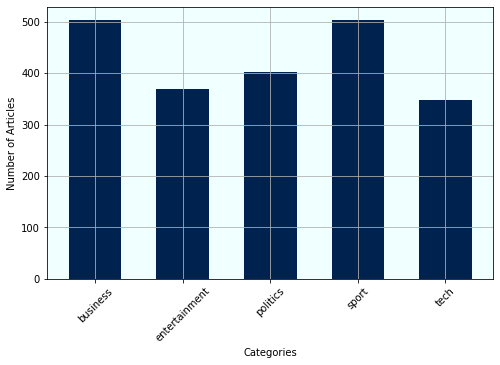

In [ ]:
# Plotting a bar graph to represent all categories and number of articles in them 
df.plot(x = "Category", kind = "bar", 
        figsize=(8,5), grid = True,
        xlabel = "Categories",
        ylabel = "Number of Articles",
        colormap= "cividis", width = 0.6, 
        rot = 45).patch.set_facecolor('#f0ffff')

We can see that **Business** and **Sports** category have the highest number of articles, while for **Tech** category the number is quite low. Number of articles will play a major role in determining the topics in them. Larger the number of articles for a category, higher will be the result satisfaction for the model.  

### **Contents**

Reindexing the data and extracting just the contents of the article i.e, the complete transcript of the article.

In [ ]:
# Reindexing the data
reindexed_data = bbc.reset_index()

# Extracting contents of all articles
reindexed_data = reindexed_data["Contents"]

# Display 
reindexed_data

0       dollar gains on greenspan speech  the dollar h...
1       china keeps tight rein on credit  china's effo...
2       indonesians face fuel price rise  indonesia's ...
3       mixed signals from french economy  the french ...
4       india's rupee hits five-year high  india's rup...
                              ...                        
2120    what price for 'trusted pc security'?  you can...
2121    tv's future down the phone line  internet tv h...
2122    mobile audio enters new dimension  as mobile p...
2123    chip maker backs net phone calls  rich templet...
2124    warnings on woeful wi-fi security  companies a...
Name: Contents, Length: 2125, dtype: object

As we can see the above dataset has got the complete set of articles, now we can use this dataset to count the top words with highest frequencies using **CountVectorizer**.

#### **CountVectorizer (Top Words)**

In order to use textual data for predictive modeling, the text must be parsed to remove certain words – this process is called **Tokenization**. 

These words then need to be encoded as integers, or floating-point values, such that they can be used as inputs in machine learning algorithms. This process is called **Feature Extraction (or Vectorization)**.

Scikit-learn’s **CountVectorizer** is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

*Now that we know what CountVectorizer is, its time we implement it to gather the top-most occuring words in out dataset.*

In [ ]:
# Function to extract top n words with highest frequency
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    The function returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample as inputs
    '''
    # encoding the document using countvectorizer object
    vectorized_content = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_content, axis=0)

    # extracting specifics for words
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    # creating a vector matrix for words
    word_vectors = np.zeros((n_top_words, vectorized_content.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    # display Vector matrix
    print(word_vectors)

    # collect the words
    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

**Removing Stopwords using NLTK (Natural Language Toolkit)**

**Stop Words**: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). Since these words occur a lot, a search engine has to be programmed to ignore them. We can easily remove them by storing a list of words that we consider to be stop words. 

**NLTK**(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. Hence we'll use it to extract our data without all such words. 

In [ ]:
# dowloading nltk stopwords module
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

We know that all of our articles are in english language, hence we'll only require stopwords in english.

In [ ]:
# extracting all stopwords for english language
stpwrd = nltk.corpus.stopwords.words('english')

# list of stopwords in english language
stpwrd

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**Now lets implement our countvectorizer to extract top words with highest frequencies.**

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


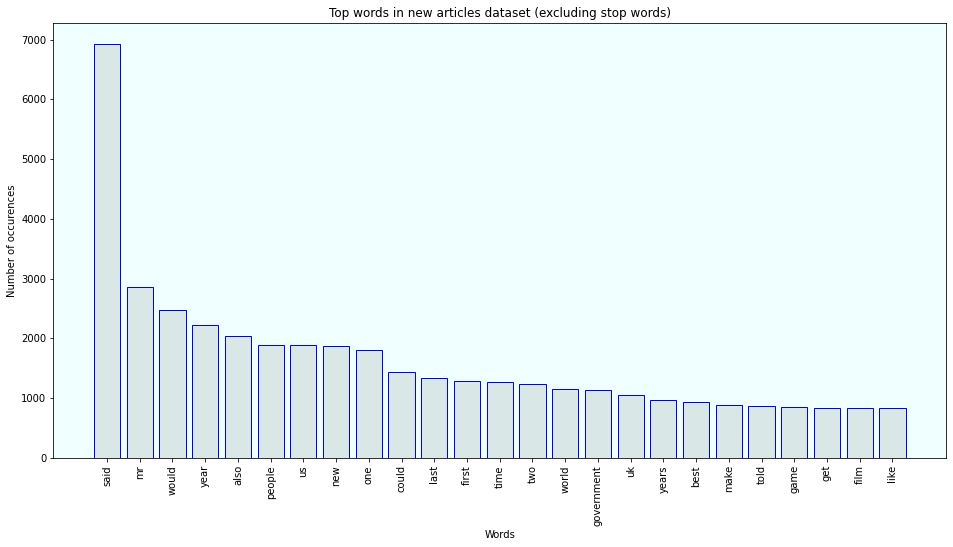

In [ ]:
# creating vectorizer object
count_vectorizer = CountVectorizer(stop_words=stpwrd)

# calling the function to get words and their counts
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

# display top 25 words using bar plot
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in new articles dataset (excluding stop words)')
ax.set_xlabel('Words')
ax.set_ylabel('Number of occurences')
ax.patch.set_facecolor('#f0ffff')
plt.show()

**Observations:** 

We can see some commonly used words like "said", "mr", "would" etc, are on top, which makes sense because no matter what the subject of a article is, these words help build up a sentence and hence the excessive use is inevitable. 

However, we can also find a few words relevant to the categories of our articles. For example, '**UK**' and '**US**'(since we converted all words to lower case, 'us' represents US too) both are country names which could reflect to any of the categories. Also words like '**government**' could reflect in articles related to Politics, Business, Tech etc.

The words like '**film**' and '**game**' sounds relevant to the entertainment category.

## **Stemming/Lemmatizing the data** (Experimental)

**Stemming** is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

**Lemmatization:** This algorithm collects all inflected forms of a word in order to break them down to their root dictionary form or lemma. Words are broken down into a part of speech (the categories of word types) by way of the rules of grammar.

In [ ]:
# contents of articles
reindexed_data

0       dollar gains on greenspan speech  the dollar h...
1       china keeps tight rein on credit  china's effo...
2       indonesians face fuel price rise  indonesia's ...
3       mixed signals from french economy  the french ...
4       india's rupee hits five-year high  india's rup...
                              ...                        
2120    what price for 'trusted pc security'?  you can...
2121    tv's future down the phone line  internet tv h...
2122    mobile audio enters new dimension  as mobile p...
2123    chip maker backs net phone calls  rich templet...
2124    warnings on woeful wi-fi security  companies a...
Name: Contents, Length: 2125, dtype: object

In [ ]:
# downloading wordNet lemmatizer
nltk.download(['wordnet','omw-1.4'])
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# lemmatizing an article to see what wordnet returns
for rows in reindexed_data:
 print(rows)
 test = [lemmatizer.lemmatize(words) for words in rows.split(' ')]
 print(test)
 break

dollar gains on greenspan speech  the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise.  and alan greenspan highlighted the us government's willingness to curb spending and rising household savings as factors which may help to reduce it. in late trading in new york, the dollar reached $1.2871 against the euro, from $1.2974 on thursday. market concerns about the deficit has hit the greenback in recent months. on friday, federal reserve chairman mr greenspan's speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected us jobs data. "i think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time," said robert sinche, head of currency strategy at bank of america in new york. "he's taking a longer-term view, laying out a set of conditions under which

As we can see the lemmatizer seems to be working fine, the words are segregated into a list. But the issue with this is for some words the lemmatizer returned ambiguous results, for example the first line says "A US government", here the lemmatizer reduced the text "US" to just "u". This takes away the whole meaning of that word.

**Now, lets try the lemmatization using Snowball Lemmatizer.**

In [ ]:
# making a lemmatizer object
sno = nltk.stem.SnowballStemmer('english')

In [ ]:
# lemmatizing an article to see what snowball lemmatizer returns
for rows in reindexed_data:
 print(rows)
 test = [sno.stem(words) for words in rows.split(' ')]
 print(test)
 break

dollar gains on greenspan speech  the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise.  and alan greenspan highlighted the us government's willingness to curb spending and rising household savings as factors which may help to reduce it. in late trading in new york, the dollar reached $1.2871 against the euro, from $1.2974 on thursday. market concerns about the deficit has hit the greenback in recent months. on friday, federal reserve chairman mr greenspan's speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected us jobs data. "i think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time," said robert sinche, head of currency strategy at bank of america in new york. "he's taking a longer-term view, laying out a set of conditions under which

Again the lemmatizer does its job and we got the list of words but as we can see some words lost their meaning completely. For example, "government" is returned as "govern", this is acceptable to some extent but we also have words like 'accus' and 'countri' derived from accusing and companies respectively. These words do not make any sense at all. This lemmatizer is much more aggresive and hence we encounter more words that lost their meaning. 

**Now lets use TextBlob for the same.**

In [ ]:
# Lemmatizing using textblob
for rows in reindexed_data:
 print(rows)
 test = [Word(words).lemmatize() for words in rows.split(' ')]
 print(test)
 break

dollar gains on greenspan speech  the dollar has hit its highest level against the euro in almost three months after the federal reserve head said the us trade deficit is set to stabilise.  and alan greenspan highlighted the us government's willingness to curb spending and rising household savings as factors which may help to reduce it. in late trading in new york, the dollar reached $1.2871 against the euro, from $1.2974 on thursday. market concerns about the deficit has hit the greenback in recent months. on friday, federal reserve chairman mr greenspan's speech in london ahead of the meeting of g7 finance ministers sent the dollar higher after it had earlier tumbled on the back of worse-than-expected us jobs data. "i think the chairman's taking a much more sanguine view on the current account deficit than he's taken for some time," said robert sinche, head of currency strategy at bank of america in new york. "he's taking a longer-term view, laying out a set of conditions under which

Here also we can see similar problems as we see in other lemmatizers, most words lost their meaning. The results are mostly similar to that of wordnet lemmatizer.

## **Feature Extraction (Vectorization)**

Vectorization is jargon for a classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support.

The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.

In [ ]:
# creating a countvectorizer object
count_vectorizer = CountVectorizer(stop_words = stpwrd, max_features = 4000)

# text before vectorization 
text_sample = reindexed_data
print('Content before vectorization: {}'.format(text_sample[123]))

# encode the textual content
document_term_matrix = count_vectorizer.fit_transform(text_sample)

# text after vectorization
print('Content after vectorization: \n{}'.format(document_term_matrix[123]))

Content before vectorization: yangtze electric's profits double  yangtze electric power, the operator of china's three gorges dam, has said its profits more than doubled in 2004.  the firm has benefited from increased demand for electricity at a time when power shortages have hit cities and provinces across the country. as a hydroelectric-power generator it has not been hurt by higher coal costs. net income jumped to 3bn yuan in 2004 ($365m; £190m), compared with 1.4bn yuan in 2003. sales surged to 6.2bn yuan, from 3bn yuan a year earlier. the figures topped analysts expectations, even though the rate of growth has slowed from 2003. analysts forecast that it is likely to decline further this year to a rate of expansion of closer to 20%.  yangtze electric has been expanding its output to meet demand driven by china's booming economy. the government has delayed the building of a number of power plants in an effort to rein in growth amid concerns that the economy may overheat. that has le

We can see that the text was succesfully converted into a vectorized numeric form. The countvectorizer works as intended, we can now move forward to implement the ML model. 

## **Model Development**

Now that all the necessary preprocessing is done, we'll implement the ML model for topic modeling on the BBC news articles. Here we have used the LDA algorithm for the purpose. Let’s discuss more about the algorithm and its specifics.

### **Latent Dirichlet Allocation (LDA)**

Latent Dirichlet Allocation (LDA) is one of most popular topic modeling technique to extract topics from a given corpus. The term latent conveys something that exists but is not yet developed. In other words, latent means hidden or concealed. The Dirichlet model describes the pattern of the words that are repeating together, occurring frequently, and these words are similar to each other.

And this stochastic process uses Bayesian inferences for explaining “the prior knowledge about the distribution of random variables”. In the case of topic modeling, the process helps in estimating what are the chances of the words, which are spread over the document, will occur again? This enables the model to build data points, estimate probabilities, that’s why LDA is a breed of generative probabilistic model.

LDA generates probabilities for the words using which the topics are formed and eventually the topics are classified into documents.

**The LDA makes two key assumptions:**
* Documents are a mixture of topics, and
* Topics are a mixture of tokens (or words)

The end goal of LDA is to find the most optimal representation of the Document-Topic matrix and the Topic-Word matrix to find the most optimized Document-Topic distribution and Topic-Word distribution.

As LDA assumes that documents are a mixture of topics and topics are a mixture of words so LDA backtracks from the document level to identify which topics would have generated these documents and which words would have generated those topics.



In [ ]:
# hyperparameter tuning using Grid Search CV
grid_params = {'n_components' : [5]}

# creating LDA model object
lda = LatentDirichletAllocation()

# fitting the model
lda_model = GridSearchCV(lda, param_grid = grid_params)
lda_model.fit(document_term_matrix)

# best LDA model
best_lda_model = lda_model.best_estimator_
print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(document_term_matrix))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -642500.8249742469
LDA model Perplexity on train data 1668.5269261447102


In [ ]:
# installing pyLDAvis to visualize the results of LDA model
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=fa11da0c6e737fcd525834f7f77aa69dfec7d974d809e9310577f5c8b66ac50c
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=14b532353864d74a6019c6d31cd7d8cb62014d19cb972c9dfeaae8cb60b430ab
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [ ]:
# importing pyLDAvis module
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


Now lets visualize the results using pyLDAvis to get the better understanding of the model. This will show us the topics found for all 5 categories and how they're distributed based on preferences.

In [ ]:
# generate and display the graph
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix, count_vectorizer, mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  30.448421
2       51.163364 -159.968018       2        1  25.235496
3      -73.144554   21.523815       3        1  23.931207
1      -66.410133 -110.606438       4        1  11.426992
0       54.417324   12.443444       5        1   8.957885, topic_info=        Term         Freq        Total Category  logprob  loglift
2377      mr  2848.000000  2848.000000  Default  30.0000  30.0000
3114    said  6864.000000  6864.000000  Default  29.0000  29.0000
1453    film   839.000000   839.000000  Default  28.0000  28.0000
2389   music   741.000000   741.000000  Default  27.0000  27.0000
3785      us  1872.000000  1872.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
2495     one   116.511122  1787.546680   Topic5  -5.6823  -0.3180
3561    take    98.155594   698.285024   Topic5  -5.8537   0.4506
3987   years    99.477760   958.821546   Topic5  -5.8403   0.1469
2620  people    99.490963  1872.479463   Topic5  -5.8402  -0.5223
3639   three    91.349510   786.347651   Topic5  -5.9256   0.2599

[399 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
0         1  0.412772              000
0         2  0.023967              000
0         3  0.238343              000
0         4  0.213044              000
0         5  0.111848              000
...     ...       ...              ...
3996      4  0.987644  yuganskneftegas
3997      4  0.996899            yukos
3998      2  0.975454          zealand
3998      3  0.010056          zealand
3998      5  0.010056          zealand

[850 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 2, 1])

From the above graph we can see the top 30 term for each topic/category in our dataset. This represents the set of words most relevant to each category. Each term in here is extracted from a respective article set and based on their relevancy they're sorted out. Top 30 terms resembles keywords that were encountered the most throughout that category.

In [ ]:
# creating docterms dataframe
docterms = lda_panel.token_table.sort_values(by = ['Freq'], ascending=False)

In [ ]:
# display docterms df
docterms

,Topic,Freq,Term
term,,,
3791,1,0.998453,users
1239,3,0.998402,election
2376,3,0.998181,mps
2049,3,0.998037,labour
2334,1,0.997957,mobile
...,...,...,...
2478,5,0.003075,office
1096,2,0.003041,digital
815,5,0.002437,companies


Here we can see all the terms with their respective frequencies belonging to each topic/category. We can use this data to develop wordclouds for each topic to represent all relevant terms for that category.

**Creating Dataframe to contain top 50 terms by topic.**

In [ ]:
# create topics dataframe
topicsdf = pd.DataFrame()

In [ ]:
# adding top 50 most relevant terms for each topic to the dataframe
for i in range(1,6):
  Topicdict ={ "Topic":i, "Terms":list(docterms[docterms['Topic']==i]['Term'].head(50))  }
  topicsdf=topicsdf.append(Topicdict,ignore_index=True)
topicsdf

,Topic,Terms
0,1.0,"[users, mobile, consumer, broadband, microsoft..."
1,2.0,"[rugby, nominations, awards, cup, nominated, i..."
2,3.0,"[election, mps, labour, lib, immigration, cons..."
3,4.0,"[bankruptcy, yukos, putin, filing, bloggers, m..."
4,5.0,"[glazer, aircraft, turkey, airbus, kenteris, b..."


### **Topic 1: Tech**



In [ ]:
# creating term freq dict for topic 1
t1dict = {}
for vals in docterms[docterms['Topic']==1].head(40).values:
  t1dict[vals[2]] =vals[1]
t1dict

{'users': 0.9984530391930866,
 'mobile': 0.9979566833019546,
 'consumer': 0.9976251871256941,
 'broadband': 0.9973282142374813,
 'microsoft': 0.9970565999135745,
 'computers': 0.9966636074183832,
 'networks': 0.9954707857902436,
 'devices': 0.9954523250380883,
 'nintendo': 0.9951456199296101,
 'apple': 0.9949318576347432,
 'retail': 0.9943035040413114,
 'gamers': 0.9940110591309217,
 'gm': 0.9940082952580184,
 'gaming': 0.9939196454559294,
 'phones': 0.9936643373086634,
 'bt': 0.9935483539326387,
 'consumers': 0.9931506899398037,
 'portable': 0.9930862844354692,
 'growth': 0.9928190297347707,
 'google': 0.9924741308279176,
 'technology': 0.990303122173058,
 'download': 0.9897547062733945,
 'gadget': 0.9891986911769404,
 'windows': 0.9891986164926855,
 'web': 0.9891185773030764,
 'pc': 0.9887449867397443,
 'technologies': 0.9880191139966161,
 'wireless': 0.9873936717173888,
 'spam': 0.98739270308861,
 'machines': 0.9870703551683907,
 'mobiles': 0.9867419792316009,
 'gadgets': 0.98674196

In [ ]:
# Generating the Wordcloud for topic 1
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='beige',
                min_font_size = 10).generate(' '.join(list(t1dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t1dict)


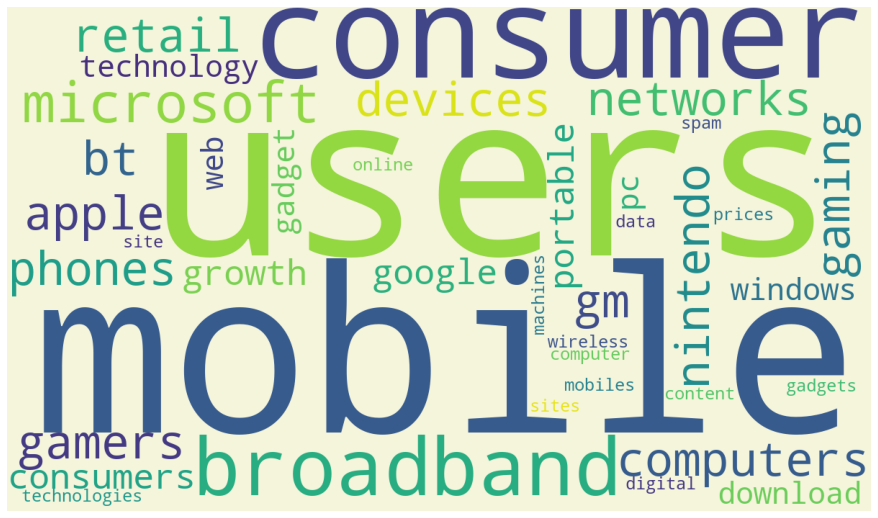

In [ ]:
# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **Topic 2: Bussiness**



In [ ]:
#creating term freq dict for topic 2
t2dict = {}
for vals in docterms[docterms['Topic']==2].head(40).values:
  t2dict[vals[2]] =vals[1]
t2dict

{'rugby': 0.9969179758675024,
 'nominations': 0.9960532506341205,
 'awards': 0.9960355591840887,
 'cup': 0.9955790616271183,
 'nominated': 0.9954418020152712,
 'injury': 0.994126612665241,
 'seed': 0.9934432688192061,
 'championships': 0.9915759467696714,
 'matches': 0.9915758604895465,
 'tournament': 0.9912833902536563,
 'roddick': 0.990604101321228,
 'referee': 0.989708898762899,
 'singles': 0.9893707660754766,
 'oscars': 0.9889565921686427,
 'tennis': 0.9886628902593877,
 'scored': 0.9886625766491214,
 'fiat': 0.9878940900461782,
 'ball': 0.9874053657766665,
 'mourinho': 0.9871313381217913,
 'holmes': 0.9862971112326159,
 'finals': 0.9854167589321156,
 'robinson': 0.9850274401043356,
 'nadal': 0.9844803869966808,
 'henry': 0.982962756753521,
 'theatre': 0.9819431502675751,
 'robbie': 0.9806944173382274,
 'federer': 0.9800777975592581,
 'gara': 0.9800777962746507,
 'matt': 0.9800711900513639,
 'foxx': 0.9794386384742074,
 'hodgson': 0.9794386384231716,
 'squad': 0.9787393652234015,
 

In [ ]:
# generating the wordcloud for topic 2
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='black',
                min_font_size = 10).generate(' '.join(list(t2dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t2dict)


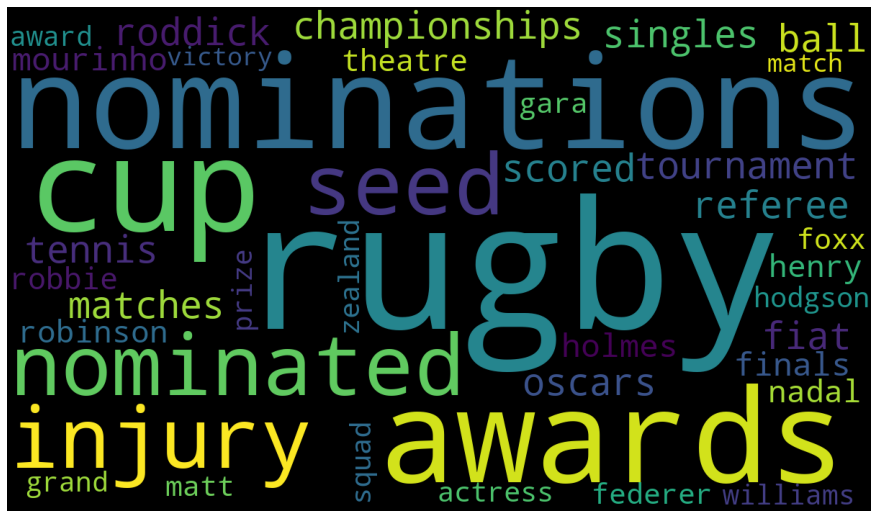

In [ ]:
# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **Topic 3: Sports**

In [ ]:
# creating term freq dict for topic 3
t3dict = {}
for vals in docterms[docterms['Topic']==3].head(40).values:
  t3dict[vals[2]] =vals[1]
t3dict

{'election': 0.9984015199866217,
 'mps': 0.998181446981537,
 'labour': 0.9980369742454152,
 'lib': 0.9974192442301828,
 'immigration': 0.9960924448320244,
 'conservative': 0.9960412026578976,
 'tory': 0.9956418288345967,
 'ukip': 0.9955439181190848,
 'commons': 0.9951073342274429,
 'kilroy': 0.9951068700427979,
 'tories': 0.9949182349918212,
 'lords': 0.9946170357232814,
 'mp': 0.9942295251858874,
 'conservatives': 0.9942291965824881,
 'blunkett': 0.9938050649265848,
 'dems': 0.9931390858843558,
 'asylum': 0.9931390376072371,
 'elections': 0.9917900344178917,
 'chancellor': 0.9914022075642496,
 'pensions': 0.9904238732463783,
 'dem': 0.9899119740752977,
 'democrat': 0.989357397526129,
 'blair': 0.987442581410631,
 'prime': 0.9873016728522265,
 'secretary': 0.9860882704046716,
 'liberal': 0.9856202037207533,
 'suspects': 0.985394188011856,
 'manifesto': 0.9840234097266873,
 'constitution': 0.983255409763492,
 'democrats': 0.982535256967399,
 'poster': 0.9819807799838247,
 'cabinet': 0.9

In [ ]:
# generating the Wordcloud for topic 3
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='magenta',
                min_font_size = 10).generate(' '.join(list(t3dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t3dict)


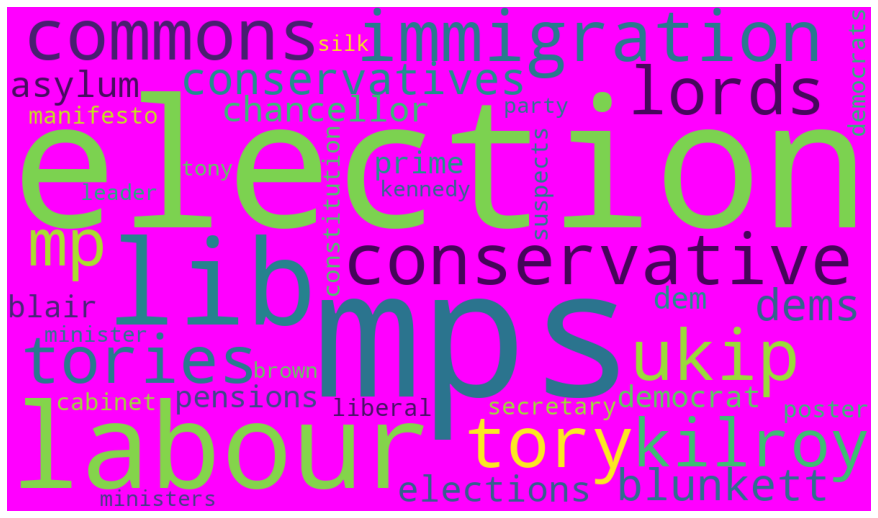

In [ ]:
# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **Topic 4: Politics**

In [ ]:
# creating term freq dict for topic 4
t4dict = {}
for vals in docterms[docterms['Topic']==4].head(40).values:
  t4dict[vals[2]] =vals[1]
t4dict

{'bankruptcy': 0.9969547123668216,
 'yukos': 0.9968992273120693,
 'putin': 0.9878059234018269,
 'filing': 0.9877989910106518,
 'bloggers': 0.9877337062937113,
 'marsh': 0.9876662816322085,
 'baikal': 0.9876438246701834,
 'yuganskneftegas': 0.9876437975022041,
 'blu': 0.9876259362755644,
 'disney': 0.9876096569795398,
 'patents': 0.9874968747583693,
 'khodorkovsky': 0.9874683896258633,
 'sec': 0.9874576971152473,
 'mci': 0.9873527157592079,
 'yugansk': 0.9873201391416838,
 'rosneft': 0.9873144744562752,
 'ebbers': 0.9872985149358203,
 'worldcom': 0.9872887443644989,
 'gazprom': 0.9872509596252146,
 'directive': 0.956132890033151,
 'saudi': 0.9513910997323609,
 'sundance': 0.9449292993341091,
 'verizon': 0.9449257574601118,
 'casinos': 0.9430170427508942,
 'fockers': 0.9430136377475853,
 'wmc': 0.9409186252334275,
 'southcorp': 0.9409180875010268,
 'patent': 0.9405193422016067,
 'tobacco': 0.9390729969090291,
 'deutsche': 0.9280303715765079,
 'executives': 0.9261931269392508,
 'accountin

In [ ]:
# generating the wordcloud for topic 4
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='cyan',
                min_font_size = 10).generate(' '.join(list(t4dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t4dict)


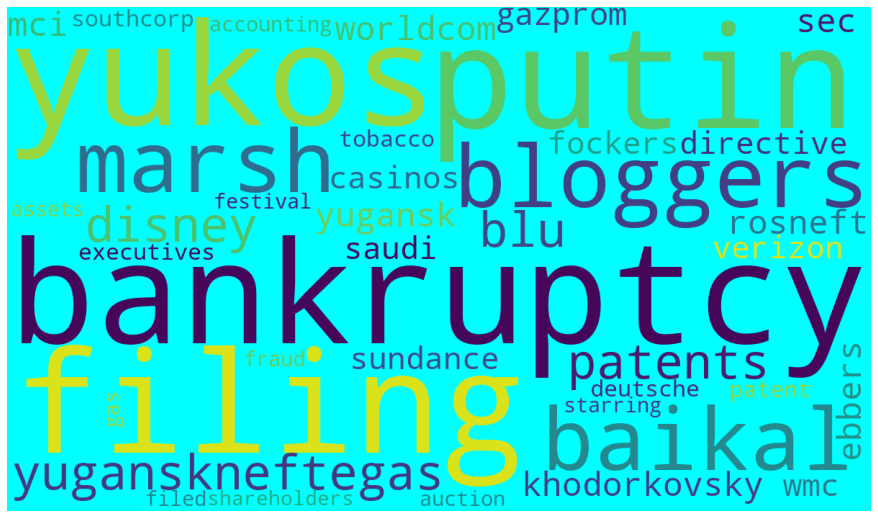

In [ ]:
# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### **Topic 5: Entertainment**

In [ ]:
# creating term freq dict for topic 5
t5dict = {}
for vals in docterms[docterms['Topic']==5].head(40).values:
  t5dict[vals[2]] =vals[1]
t5dict

{'glazer': 0.9895364802034874,
 'aircraft': 0.9890522450525004,
 'turkey': 0.9884010438925515,
 'airbus': 0.9856958118001685,
 'kenteris': 0.9848576359785804,
 'balco': 0.9847260952317617,
 'iaaf': 0.9843512420173608,
 'gig': 0.9825909648196822,
 'thanou': 0.9796375930962234,
 'parry': 0.9789498580217821,
 'sprinters': 0.9787950025677169,
 'embargo': 0.9787800911682297,
 'boeing': 0.9767235756454387,
 'hunts': 0.9757534901050426,
 'concert': 0.9750916087673719,
 'conte': 0.972375269965967,
 'redknapp': 0.9701696836886498,
 'csi': 0.970160742458539,
 'blackpool': 0.9700090912670293,
 'musicians': 0.9681507864684215,
 'orchestra': 0.967951655331371,
 'doping': 0.9657715441692899,
 'wal': 0.9567482837022974,
 'mart': 0.9549326132129716,
 'greek': 0.9531659926034604,
 'hunt': 0.9465645774536656,
 'hop': 0.9352825841627189,
 'ham': 0.9346091610385117,
 'urban': 0.9303704490710035,
 'spurs': 0.9239438630573357,
 'hunting': 0.9044217039633081,
 'banned': 0.8847516470305491,
 'hip': 0.87383919

In [ ]:
# generating the wordcloud for topic 5
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='maroon',
                min_font_size = 10).generate(' '.join(list(t5dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t5dict)


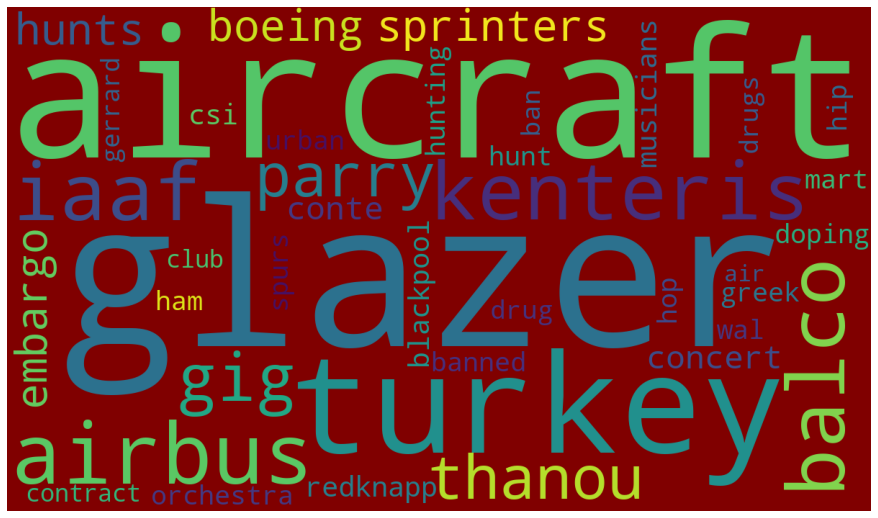

In [ ]:
# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## **Conclusions**

1. While reading the text files, we noticed that the file encoding was different in a few off-cases. We found that considering such factors, and engineering based on such knowledge, is very important while handling such data, in order to do so efficiently.

2. Upon experimenting with stemming and lemmatization on our dataset, we found that although it saves space and perhaps time, in our case, it's better to focus on quality, and avoid nuances. In our own 'cost-benefit' analysis, the difference weren't all that significant. Perhaps at a massive scale, the former approach would be ideal.

3. We noticed that it's more optimal to tokenize with no factual differences. 
so we lowercased the contents to unify tokens that may have just case-differences.

4. These are the optimal lda metrics that we got after implementing GridSearchCV: 

  Best LDA model's params {'n_components': 5}

  Best log likelihood Score for the LDA model -643494.9704171557

  LDA model Perplexity on train data 1696.6352006244963

5. Upon looking at the top n topics generated, we were able to correlate it with relevance to what was expected at a significant degree, whilst also shedding light on some unseen aspects.. Hence, we see that the model effectively beared fruit. 

*At the end a word of Thankyou to you for going through our project till the very end, we appreciate your time. Happy Learning...!*